In [1]:
import numpy as np
import structure
import bfgs
import bfgs_2

# P6

## Test problem for P6

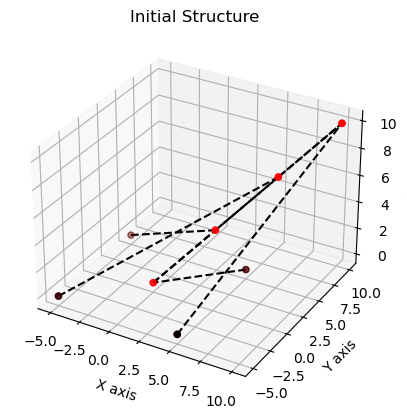

Number of iterations:  223 
Eucledian norm of gradient:  9.569854458989998e-11


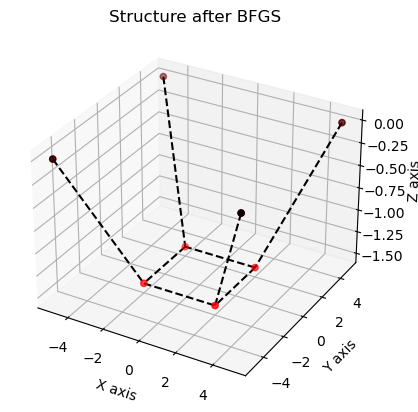

Final position for the free nodes:
 [[ 2.   2.  -1.5]
 [-2.   2.  -1.5]
 [-2.  -2.  -1.5]
 [ 2.  -2.  -1.5]]


In [2]:
N = 8 #Nodes
k = 3 #Cable constant
cable_value = 3 
cable_instructions = [
    [1, 5, cable_value],  #(row, column, value)
    [2, 6, cable_value],  
    [3, 7, cable_value],
    [4, 8, cable_value],
    [5, 6, cable_value],
    [5, 8, cable_value],
    [6, 7, cable_value],
    [7, 8, cable_value],
]

#Fixed nodes
p = np.array([
    [5, 5, 0],  
    [-5, 5, 0],  
    [-5, -5, 0],  
    [5, -5, 0]
]).flatten()

#Variable nodes
x = np.array([
    [10, 2, -3/2],  
    [-2, 4, -3/2],  
    [-7, -2, 3/2],  
    [2, -2, -3/2]
]).flatten()

#Initial position
size = 4
linspace_1 = np.linspace(0, 10, size)
final_array = np.empty(size * 3)
final_array[0::3] = linspace_1
final_array[1::3] = linspace_1
final_array[2::3] = linspace_1
x = final_array.flatten()

mg = 1/6 #Constant

#Creating the object  
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg) 

#Plotting
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, "Initial Structure")
result = bfgs.BFGS(structure_instance, x, tol = 10**(-10))
structure_instance.change_x(result)
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, "Structure after BFGS")
print("Final position for the free nodes:\n", result.reshape(4, 3))

## Test problem for P10

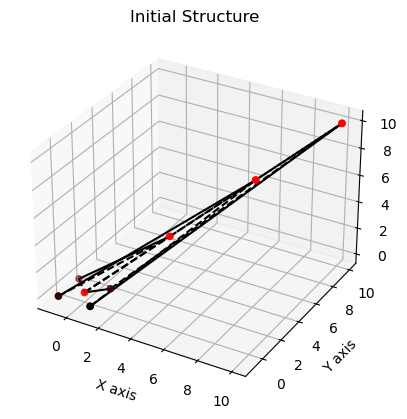

Number of iterations:  669 
Eucledian norm of gradient:  9.961311998699539e-11


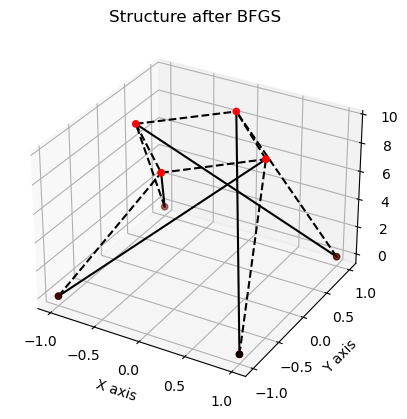

Final position for the free nodes:
 [[-7.09710266e-01 -1.27678494e-08  9.54287110e+00]
 [ 1.89984151e-08 -7.09710304e-01  9.54287109e+00]
 [ 7.09710309e-01 -1.90081917e-08  9.54287110e+00]
 [ 2.56812428e-08  7.09710272e-01  9.54287111e+00]]


In [3]:
N = 8 #Node number
k = 0.1 #Cable constant
cable_instructions = [
    [1,8,8], # (row, column, value)
    [2,5,8],
    [3,6,8],
    [4,7,8],
    [5,6,1],
    [6,7,1],
    [7,8,1],
    [5,8,1]
]

c = 1 #Bar constant
bar_instructions = [
    [1,5,10],  
    [2,6,10],  
    [3,7,10],
    [4,8,10],
]

#Fixed nodes
p = np.array([
    [1, 1, 0],  
    [-1, 1, 0],  
    [-1, -1, 0],  
    [1, -1, 0]
]).flatten()

mg = 0 #Constant
pg = 0 #Constant

#Initial positions
final_array = np.empty(size * 3)
final_array[0::3] = linspace_1
final_array[1::3] = linspace_1
final_array[2::3] = linspace_1
x = final_array.flatten()

#Creating Object
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg, bar_instructions, pg, c)

s = 0.7097 #Constant
t = 9.54287 #Constant

#Variable nodes
x_actual = np.array([
    [-s,0,t],  
    [0,-s,t],  
    [s,0,t],  
    [0,s,t]]).flatten()

#Plotting
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid,"Initial Structure")
result = bfgs.BFGS(structure_instance, x, tol = 10**(-10))
structure_instance.change_x(result)            
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, "Structure after BFGS")
print("Final position for the free nodes:\n", result.reshape(4, 3))

# P12

## Code for non-convex constrained optimization

## Test problem for P12

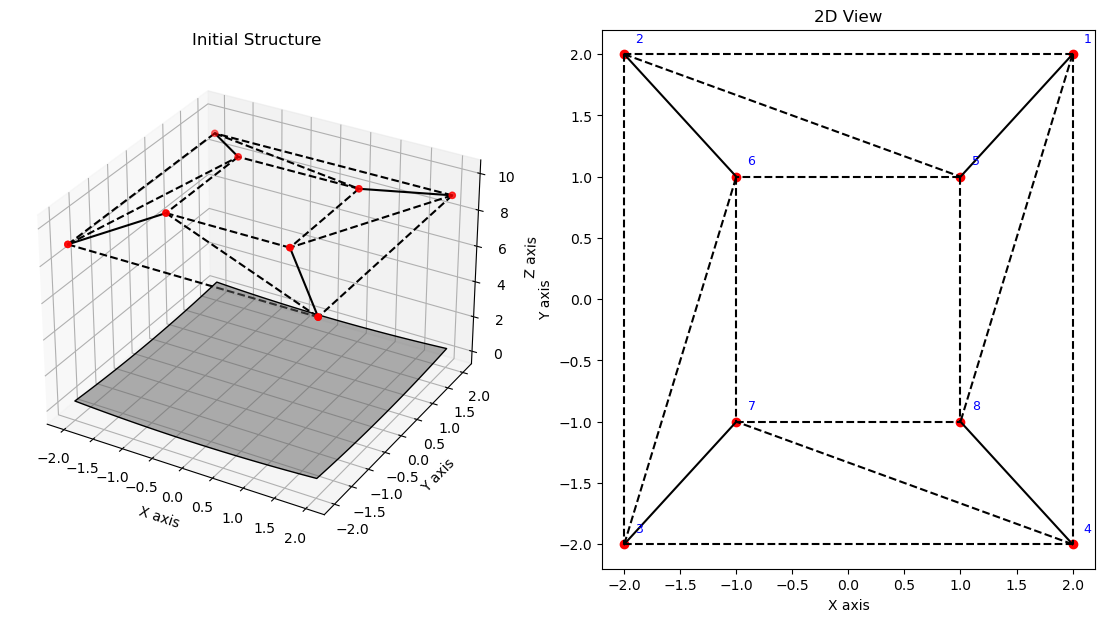

Number of iterations:  361 
Eucledian norm of gradient:  9.683327322767293e-09
Number of iterations:  192 
Eucledian norm of gradient:  8.905361467748217e-09
Number of iterations:  194 
Eucledian norm of gradient:  8.92888297113621e-09
Number of iterations:  140 
Eucledian norm of gradient:  9.526107496040452e-09
Number of iterations:  197 
Eucledian norm of gradient:  8.836006586513718e-09
Number of iterations:  135 
Eucledian norm of gradient:  8.451907945479244e-09
Number of iterations:  134 
Eucledian norm of gradient:  7.283070882342904e-09
Too little change


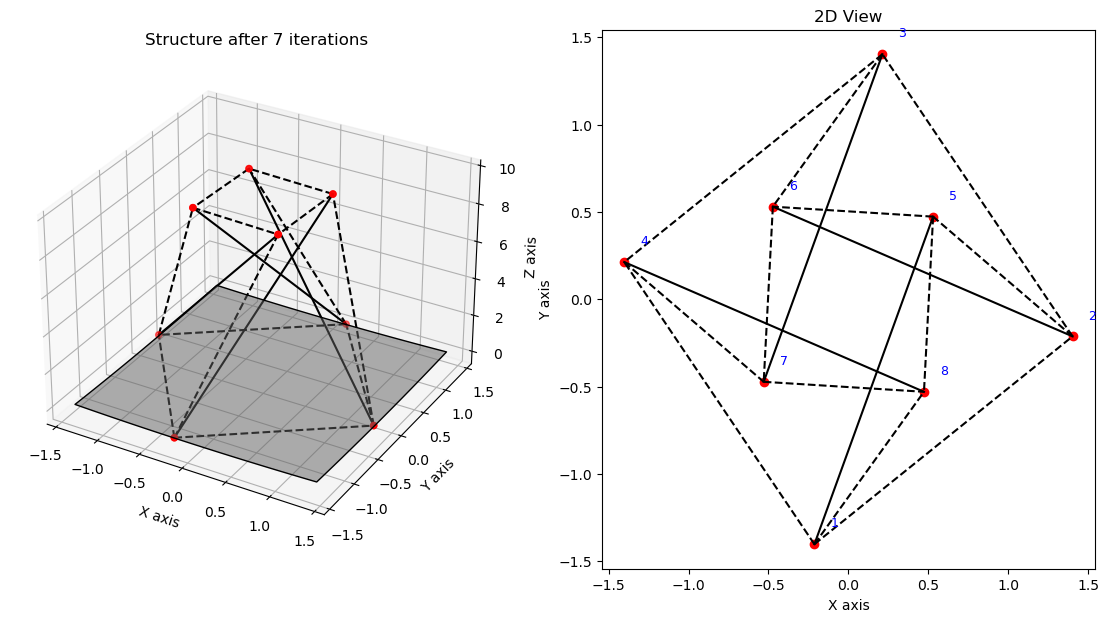

In [4]:
N = 8 #Node number
k = 0.1 #Cable constant
cable_instructions = [
    [1,8,8], # (row, column, value)
    [2,5,8],
    [3,6,8],
    [4,7,8],
    [5,6,1],
    [6,7,1],
    [7,8,1],
    [5,8,1],
    [1,2,2],
    [2,3,2],
    [3,4,2],
    [1,4,2]
]

c = 1 #Bar constant
bar_instructions = [
    [1,5,10],  
    [2,6,10],  
    [3,7,10],
    [4,8,10],
]

#Fixed nodes
p = np.array([])

#Variable nodes
x = np.array([
    [2, 2, 9],  
    [-2, 2, 9],  
    [-2, -2, 9],  
    [2, -2, 9],
    [1, 1, 10],  
    [-1, 1, 10],  
    [-1, -1, 10],  
    [1, -1, 10]
]).flatten()

mg = 0 #Constant
pg = 10**(-4) #Constant

#Floor function
def f(x1, x2):
    return (x1**2+x2**2)/20

#Creating object + Plotting + BFGS
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg, bar_instructions, pg, c, f)
bfgs_2.plot_3d_points_2(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid,"Initial Structure")
mu = 1
result, H, potential_energy = bfgs_2.BFGS_2(structure_instance, x, f, mu, np.eye(3*(structure_instance.N-structure_instance.M)), tol=10**(-8))

#Penalty optimization
max_iterations = 6
for i in range(max_iterations):
    mu *= 5
    result_p1, H, potential_energy = bfgs_2.BFGS_2(structure_instance, result, f, mu, np.eye(3*(structure_instance.N-structure_instance.M)), tol = 10**(-8))
    if np.linalg.norm(result-result_p1) < 10**(-6):
        print("Too little change")
        max_iterations = i
        break
    result = result_p1.copy()
        
#Change to new x_value and plotting        
structure_instance.change_x(result_p1)
bfgs_2.plot_3d_points_2(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, f"Structure after {max_iterations+2} iterations")

## Another test problem for P12, with stached structures

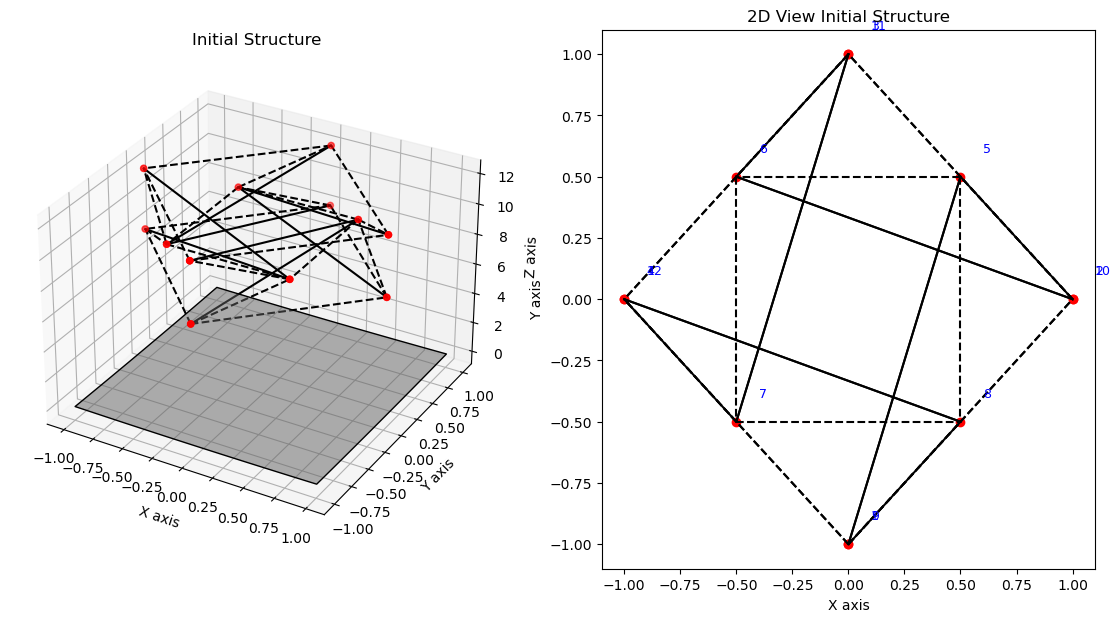

Number of iterations:  396 
Eucledian norm of gradient:  9.753458055700432e-09
Number of iterations:  227 
Eucledian norm of gradient:  9.875690875217187e-09
Number of iterations:  286 
Eucledian norm of gradient:  9.212236475172612e-09
Number of iterations:  238 
Eucledian norm of gradient:  9.432587856302523e-09
Number of iterations:  193 
Eucledian norm of gradient:  9.232756241274239e-09
Number of iterations:  159 
Eucledian norm of gradient:  9.930264525483915e-09
Number of iterations:  206 
Eucledian norm of gradient:  3.2486728341586105e-09
Number of iterations:  167 
Eucledian norm of gradient:  9.96003960910299e-09
The change was too little


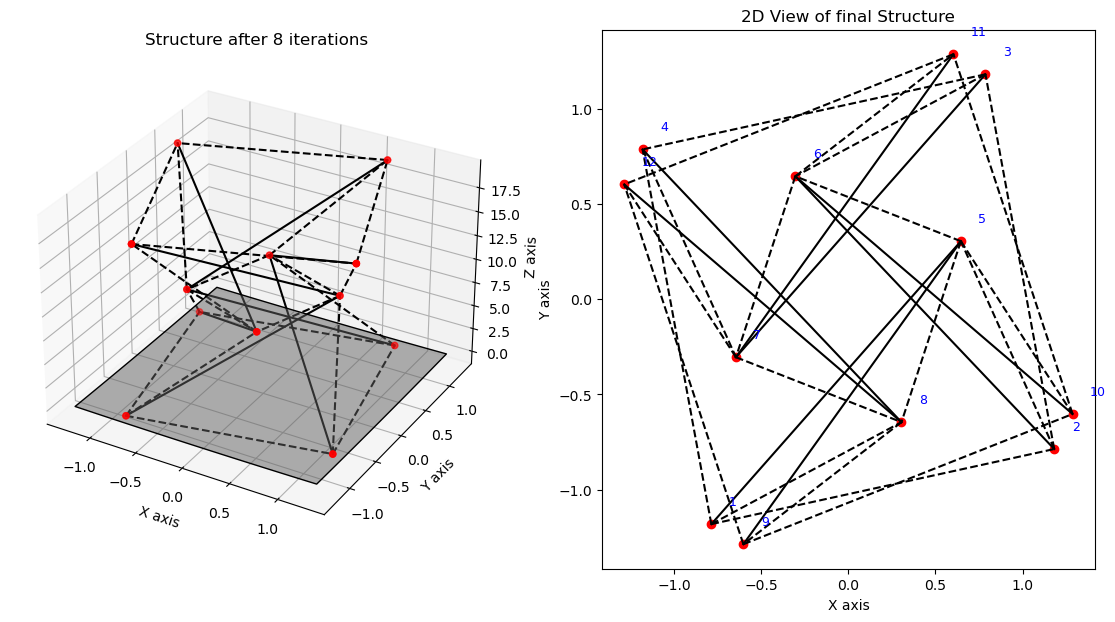

In [5]:
N = 12 #Nodes
k = 0.1 #cable constant
cable_instructions = [
    [1,8,8], # (row, column, value)
    [2,5,8],
    [3,6,8],
    [4,7,8],
    [5,6,1],
    [6,7,1],
    [7,8,1],
    [5,8,1],
    [1,2,2],
    [2,3,2],
    [3,4,2],
    [1,4,2],
    [5,10,8],
    [6,11,8],
    [7,12,8],
    [8,9,8],
    [9,10,2],
    [10,11,2],
    [11,12,2],
    [9,12,2]
]

c = 1 #bar constant
bar_instructions = [
    [1,5,10],  
    [2,6,10],  
    [3,7,10],
    [4,8,10],
    [5,9,10],  
    [6,10,10],  
    [7,11,10],
    [8,12,10]
]

#Fixed nodes
p = np.array([])

#Variable nodes
x = np.array([
    [0, -1, 8],  
    [1, 0, 8],  
    [0, 1, 8],  
    [-1, 0, 8],
    [0.5, 0.5, 10],  
    [-0.5, 0.5, 10],  
    [-0.5, -0.5, 10],  
    [0.5, -0.5, 10],
    [0, -1, 12],  
    [1, 0, 12],  
    [0, 1, 12],  
    [-1, 0, 12]
]).flatten()

mg = 0 #Constant
pg = 10**(-4) #Constant

#Floor function
def f(x1, x2):
    return (x1**2+x2**2)/20

#Create new object
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg, bar_instructions, pg, c, f)

#Plotting + BFGS
bfgs_2.plot_3d_points_2(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid,"Initial Structure", "2D View Initial Structure")
mu = 1 
result, H, potential_energy = bfgs_2.BFGS_2(structure_instance, x, f, mu, np.eye(3*(structure_instance.N-structure_instance.M)), tol=10**(-8))

#Penalty optimization
max_iterations = 7
for i in range(max_iterations):
    mu *= 5
    result_p1, H, potential_energy = bfgs_2.BFGS_2(structure_instance, result, f, mu, np.eye(3*(structure_instance.N-structure_instance.M)), tol = 10**(-8))
    
    if np.linalg.norm(result-result_p1) < 10**(-6):
        print("The change was too little")
        max_iterations = i
        break
    result = result_p1.copy()
    
#Change to new x-value and plot    
structure_instance.change_x(result_p1)
bfgs_2.plot_3d_points_2(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, f"Structure after {max_iterations+2} iterations", "2D View of final Structure")

# Example for local and global minimizer #

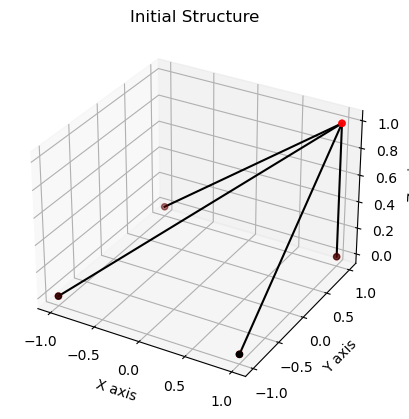

Number of iterations:  186 
Eucledian norm of gradient:  8.52390705715771e-11


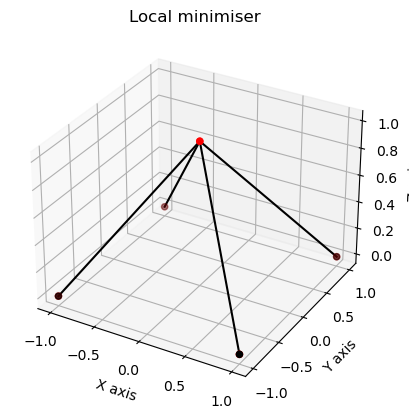

In [6]:
N = 5 #Nodes
k = 0.1 #Cable constant
cable_instructions = []

c = 1 #Bar constant
bar_instructions = [
    [1,5,2],  
    [2,5,2],  
    [3,5,2],
    [4,5,2],
]

#Fixed nodes
p = np.array([
    [1, 1, 0],  
    [-1, 1, 0],  
    [-1, -1, 0],  
    [1, -1, 0]
]).flatten()

mg = 0.1 #Constant
pg = 0  #Constant

#Variable nodes
x = np.array([1,1,1])

#Create object
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg, bar_instructions, pg, c)

#Plotting + BFGS
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid,"Initial Structure")
result = bfgs.BFGS(structure_instance, x, tol = 10**(-10))
structure_instance.change_x(result)            
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, "Local minimiser")

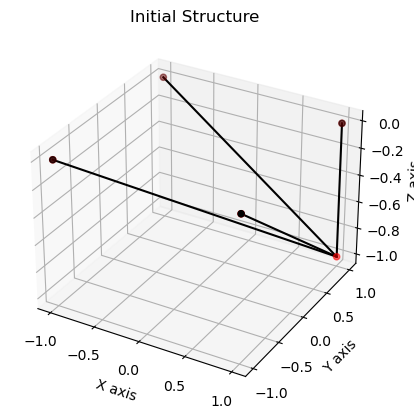

Number of iterations:  197 
Eucledian norm of gradient:  9.626566936862644e-11


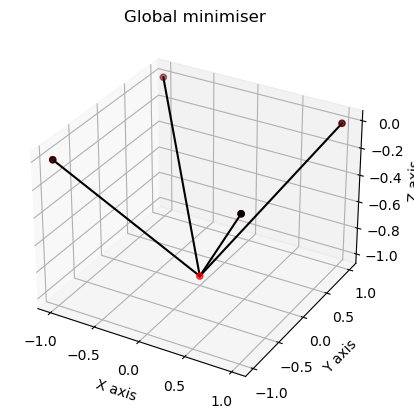

In [7]:
N = 5 #Nodes 
k = 0.1 #Cable constant
cable_instructions = []

c = 1 #Bar constant
bar_instructions = [
    [1,5,2],  
    [2,5,2],  
    [3,5,2],
    [4,5,2],
]

#Fixed nodes
p = np.array([
    [1, 1, 0],  
    [-1, 1, 0],  
    [-1, -1, 0],  
    [1, -1, 0]
]).flatten()

mg = 0.1 #Constant
pg = 0  #Constant

#Variable nodes
x = np.array([1,1,-1])

#Creating object
structure_instance = structure.Structure(N, k, cable_instructions, p, x, mg, bar_instructions, pg, c)

#Plotting + BFGS
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid,"Initial Structure")
result = bfgs.BFGS(structure_instance, x, tol = 10**(-10))
structure_instance.change_x(result)            
bfgs.plot_3d_points(structure_instance.x.reshape((N, 3)), structure_instance.cable_grid, structure_instance.bar_grid, "Global minimiser")